# Visualizing Chipotle's Data

In [1]:
# Step 1. Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# set this so the graphs open internally
%matplotlib inline


In [2]:
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.

chipo=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep="\t")
chipo["item_price"]=chipo["item_price"].str.replace("$","").astype("float")

C:\Users\HP\AppData\Local\Temp\ipykernel_3880\2252375744.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo["item_price"]=chipo["item_price"].str.replace("$","").astype("float")


In [3]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


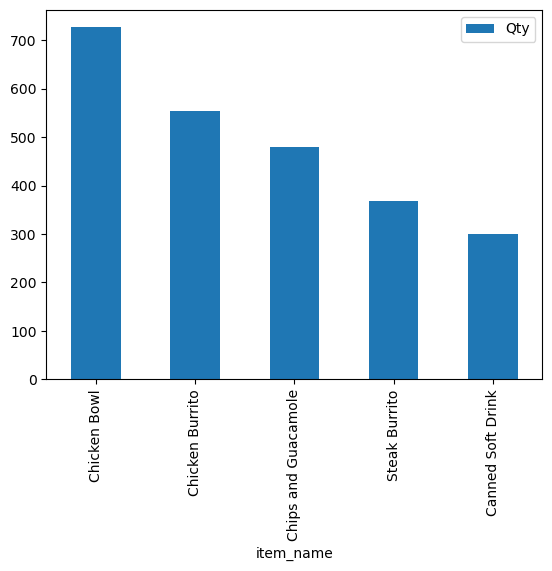

In [15]:
# Step 5. Create a histogram of the top 5 items bought
top_hist=pd.DataFrame(chipo.value_counts("item_name").iloc[:5]).set_axis(["Qty"],axis=1)
# top_hist.hist()
top_hist["item_name"]=top_hist.index
top_hist.plot(x='item_name',y='Qty',kind='bar')
plt.show()

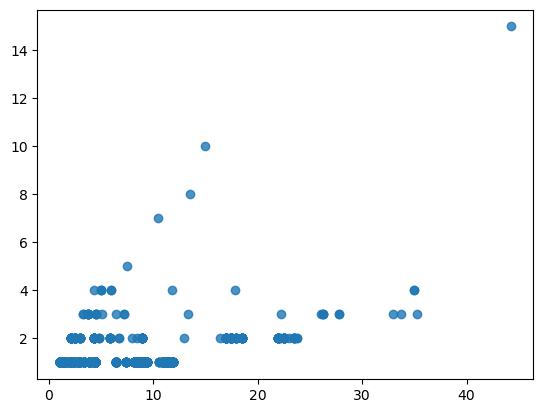

In [16]:
# Step 6. Create a scatterplot with the number of items orderered per order price
plt.scatter(chipo["item_price"],chipo["quantity"],alpha=0.8,)

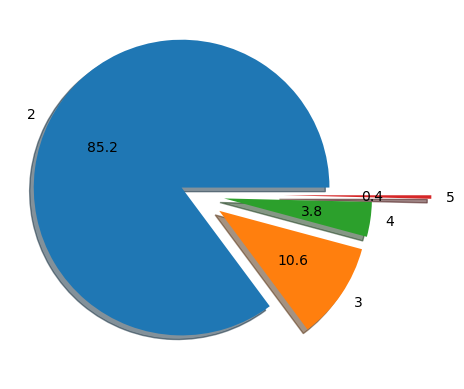

In [26]:
# Step 7. BONUS: Create a question and a graph to answer your own question
#  Create a sliced piechart for top 4 quantities per order for whole Data skip the first.
# chipo["quantity"].value_counts()
labels=chipo["quantity"].value_counts().index[1:5]
plt.pie(chipo["quantity"].value_counts()[1:5],explode=[0.1,0.2,0.2,0.6],labels=labels,autopct="%0.1f",shadow=1)
plt.show()

# Online Retails Purchase

In [142]:
# Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Step 2. Import the dataset from this address.
# Note :- if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv() .
# Step 3. Assign it to a variable called online_rt
address= pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv",encoding = 'latin1')
address

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


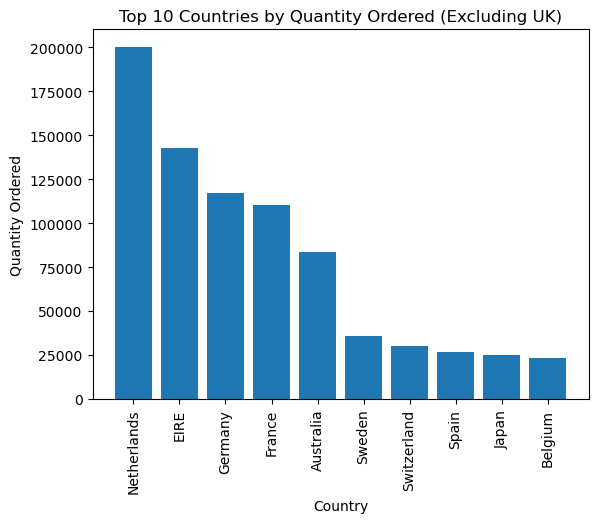

In [32]:
# Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK
countries=address[address["Country"]!= "United Kingdom"].groupby("Country")["Quantity"].sum()
top_10=countries.sort_values(ascending=False)[:10]
plt.bar(top_10.index,top_10.values)
plt.xlabel('Country')
plt.ylabel('Quantity Ordered')
plt.title('Top 10 Countries by Quantity Ordered (Excluding UK)')
plt.xticks(rotation=90)
plt.show()

In [122]:
# Step 5. Exclude negative Quantity entries
address = address[address["Quantity"] > 0 ]

C:\Users\HP\AppData\Local\Temp\ipykernel_8224\2552265099.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = address[address["Country"].isin(top3_countries)].groupby(["CustomerID","Country"])['Quantity','UnitPrice'].sum().reset_index()


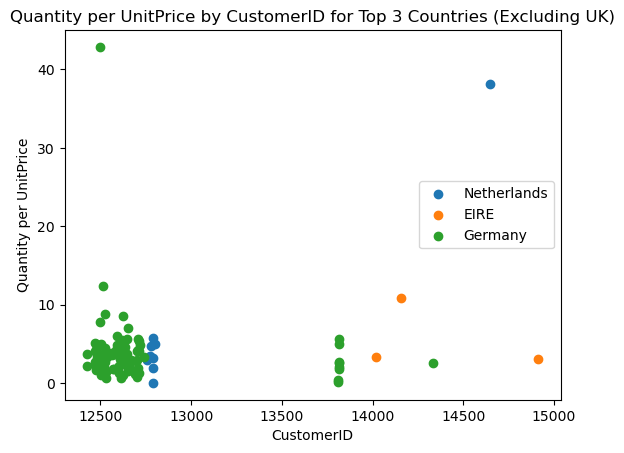

In [45]:
# Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)
top3_countries = address[address["Country"] != "United Kingdom"].groupby("Country")["Quantity"].sum().nlargest(3).index
data = address[address["Country"].isin(top3_countries)].groupby(["CustomerID","Country"])['Quantity','UnitPrice'].sum().reset_index()
data["QuantityPerPrice"]= data["Quantity"] / data["UnitPrice"]
for country in top3_countries:
    subset = data[data["Country"]==country]
    plt.scatter(subset['CustomerID'], subset['QuantityPerPrice'], label=country)

plt.xlabel('CustomerID')
plt.ylabel('Quantity per UnitPrice')
plt.title('Quantity per UnitPrice by CustomerID for Top 3 Countries (Excluding UK)')
plt.legend()
plt.show()


In [ ]:
# Step 7. Investigate why the previous results look so uninformative.

# the choice of visualization and the informativeness of the results depend on the nature of your data and the specific insights 
# you're seeking to uncover.Experimenting with different approaches and visualizations can 
# often lead to a more informative representation of the data.

C:\Users\HP\AppData\Local\Temp\ipykernel_8224\3842439078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Revenue"] = data["Quantity"] * data["UnitPrice"]


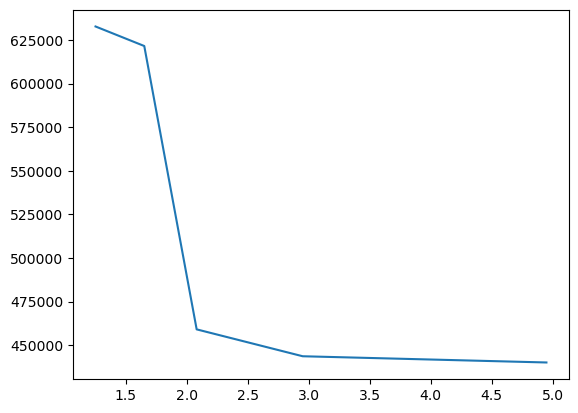

In [86]:
# 8. Plot a line chart showing revenue (y) per UnitPrice (x).
data = address[(address["Quantity"] > 0) & (address["UnitPrice"] > 0)]
data["Revenue"] = data["Quantity"] * data["UnitPrice"]
line=data.groupby("UnitPrice")["Revenue"].sum().nlargest(5)
plt.plot(line.index,line.values)
plt.show()

In [147]:
# 8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue .

ad1=data[(data["UnitPrice"]<=50) & (data["UnitPrice"] > 0)]
ad1['unit_price']=ad1['UnitPrice']//1
ans=ad1.groupby('unit_price')['Quantity','Revenue'].sum()
ans["Revenue"] = (ans["Revenue"] / 1000000).round(5)                 # ".round(Num of Decimal points)"    Most IMP
ans["Quantity"] = (ans["Quantity"]/1000000)

C:\Users\HP\AppData\Local\Temp\ipykernel_8224\494344797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad1['unit_price']=ad1['UnitPrice']//1
C:\Users\HP\AppData\Local\Temp\ipykernel_8224\494344797.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ans=ad1.groupby('unit_price')['Quantity','Revenue'].sum()


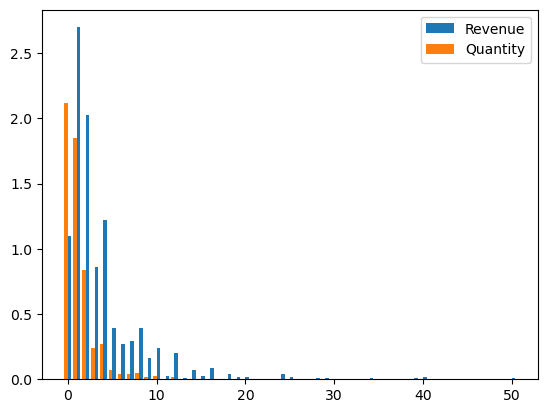

In [180]:
# 8.3 Plot.
# 8.4 Make it look nicer.
plt.bar(ans.index+0.2,ans["Revenue"],width=0.4,label="Revenue")
plt.bar(ans.index-0.2,ans["Quantity"],width=0.4,label="Quantity")
plt.legend()
plt.show()

# Scores

In [181]:
# Step 1. Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
# Step 2. Create the DataFrame that should look like the one below.
scores = pd.read_csv("Scores.txt",sep=" ")
scores

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


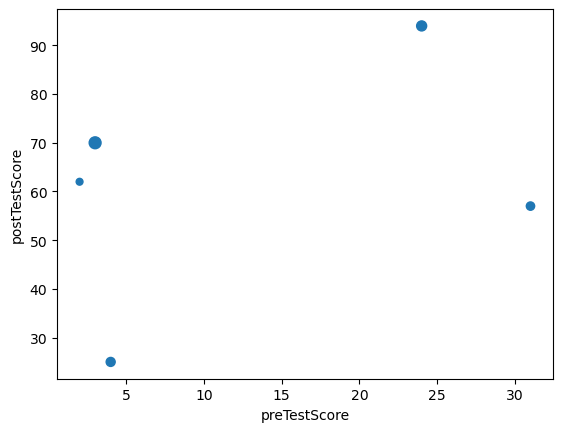

In [185]:
# Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
plt.scatter(scores["preTestScore"],scores["postTestScore"],s=scores["age"])
plt.xlabel("preTestScore")
plt.ylabel("postTestScore")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


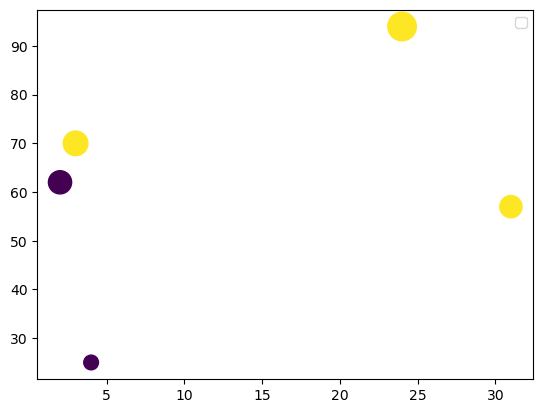

In [196]:
# Step 4. Create a Scatterplot of preTestScore and postTestScore
plt.scatter(scores["preTestScore"],scores["postTestScore"],s=scores["postTestScore"]*4.5,c=scores["female"])
plt.legend()
plt.show()

# Tips

In [4]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called tips
tips = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv")
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# Step 4. Delete the Unnamed 0 column
tips =tips.drop(columns="Unnamed: 0")

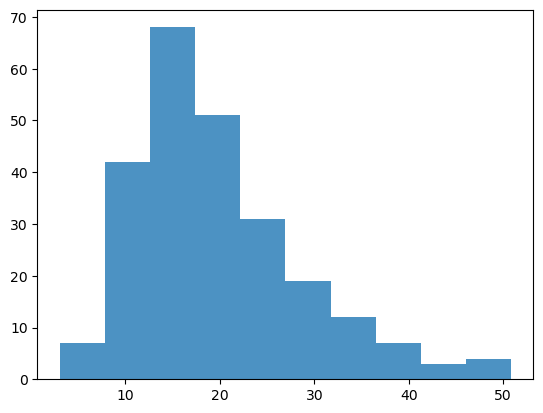

In [7]:
# Step 5. Plot the total_bill column histogram
plt.hist(tips["total_bill"],alpha=0.8)
plt.show()

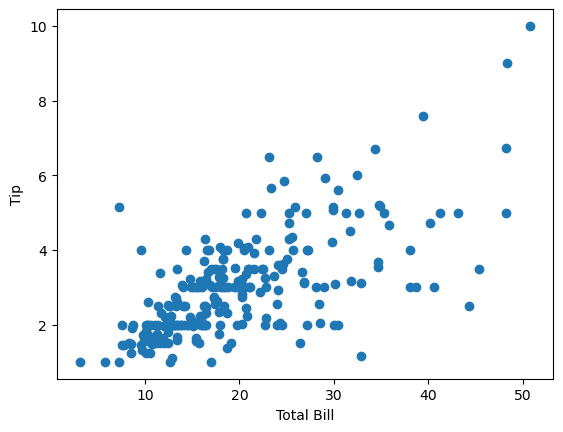

In [8]:
# Step 6. Create a scatter plot presenting the relationship between total_bill and tip
plt.scatter(tips["total_bill"],tips["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

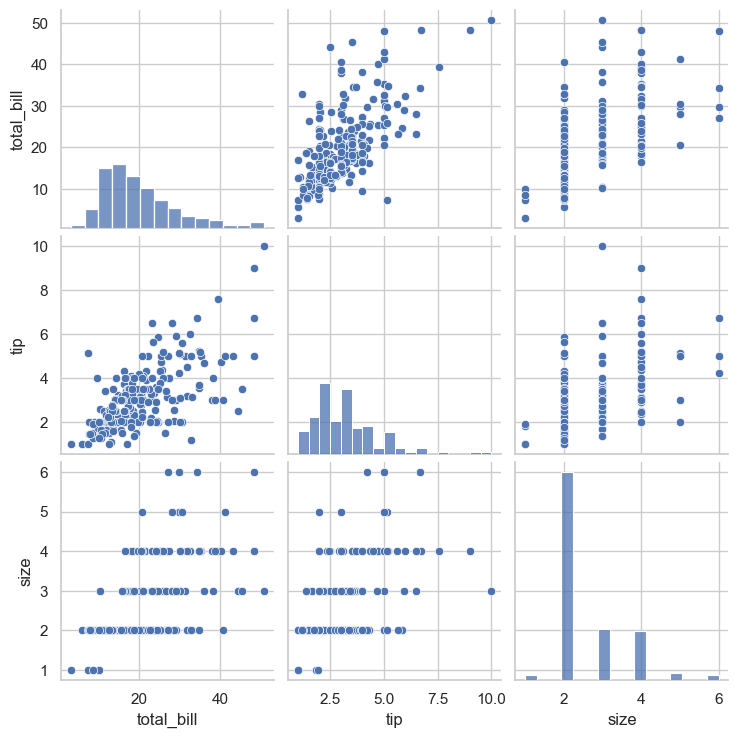

In [9]:
# Step 7. Create one image with the relationship of total_bill, tip and size.
sns.load_dataset("tips")
sns.set(style="whitegrid") #style must be one of white, dark, whitegrid, darkgrid, ticks
sns.pairplot(tips, vars=["total_bill", "tip", "size"])
plt.show()

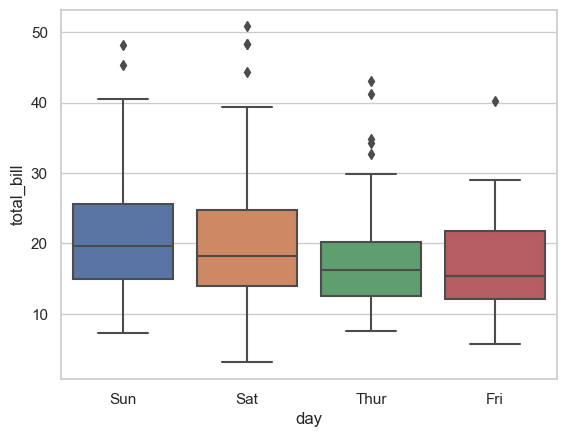

In [15]:
# Step 8. Present the relationship between days and total_bill value

sns.boxplot(x=tips["day"],y=tips["total_bill"])
plt.show()

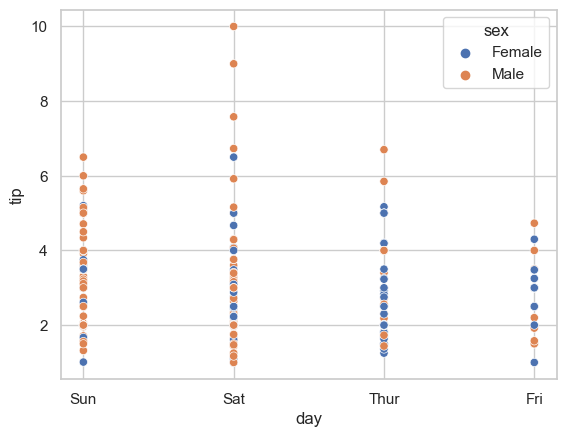

In [17]:
# Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex
sns.scatterplot(x=tips["day"],y=tips["tip"],hue=tips["sex"])
plt.show()

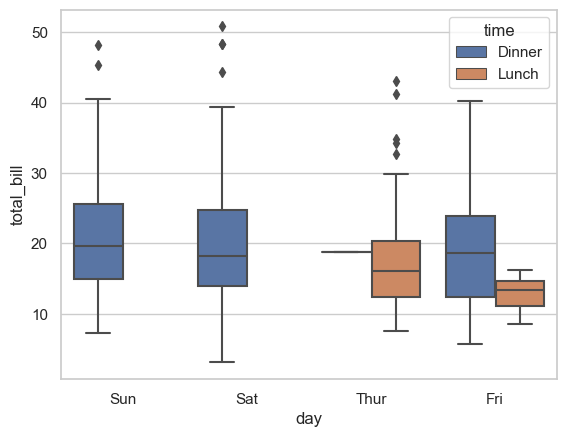

In [21]:
# Step 10. Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)
sns.boxplot(x=tips["day"],y=tips["total_bill"],hue=tips["time"])
plt.show()

<AxesSubplot:xlabel='tip', ylabel='Count'>

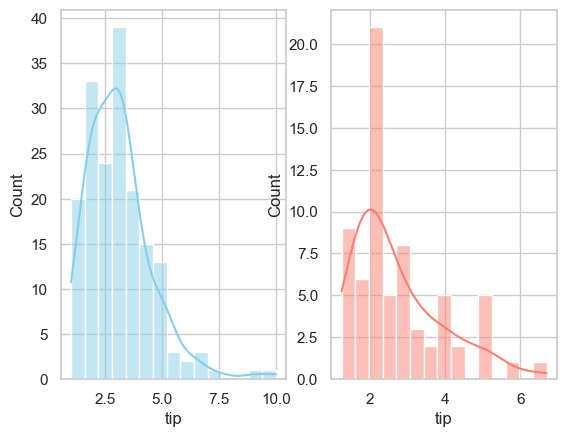

In [20]:
# Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

plt.subplot(1,2,1)
sns.histplot(data=tips[tips['time'] == 'Dinner'], x='tip', bins=15, kde=True, color='skyblue')

plt.subplot(1,2,2)
sns.histplot(data=tips[tips['time'] == 'Lunch'], x='tip', bins=15, kde=True, color='salmon')


Text(0.5, 1.0, 'Female Relationship')

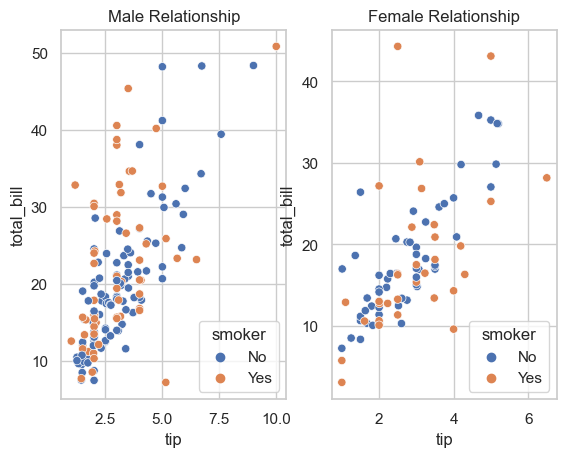

In [32]:
# Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip
#          relationship, differing by smoker or no smoker
plt.subplot(1,2,1)   
sns.scatterplot(x=tips[tips["sex"]=="Male"]["tip"],y=tips[tips["sex"]=="Male"]["total_bill"],hue=tips["smoker"])
plt.title("Male Relationship")

plt.subplot(1,2,2)   
sns.scatterplot(x=tips[tips["sex"]=="Female"]["tip"],y=tips[tips["sex"]=="Female"]["total_bill"],hue=tips["smoker"])
plt.title("Female Relationship")

# Visualizing the Titanic Disaster

In [34]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable titanic
titanic=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# Step 4. Set PassengerId as the index
titanic.set_index("PassengerId",inplace=True)

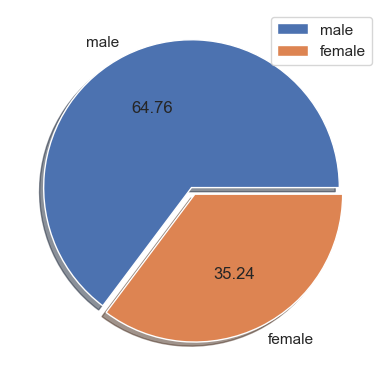

In [63]:
# Step 5. Create a pie chart presenting the male/female proportion
plt.pie(titanic["Sex"].value_counts(),autopct='%0.2f',labels=titanic["Sex"].value_counts().index,shadow=1,explode=[0.05,0])
plt.legend()
plt.show()

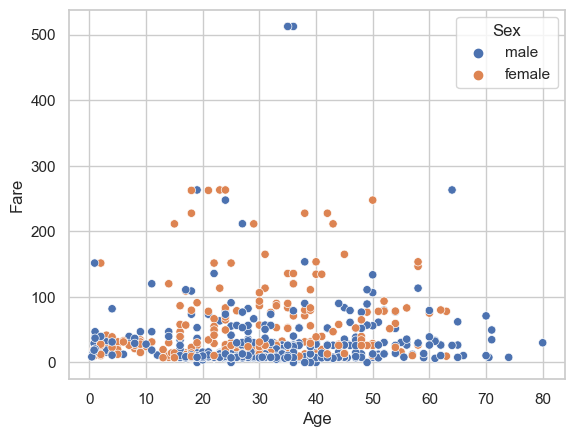

In [67]:
# Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
sns.scatterplot(x=titanic["Age"],y=titanic["Fare"],hue=titanic["Sex"])
plt.show()

In [71]:
# Step 7. How many people survived?
print("Survived :",titanic["Survived"].value_counts()[1])

Survived : 342


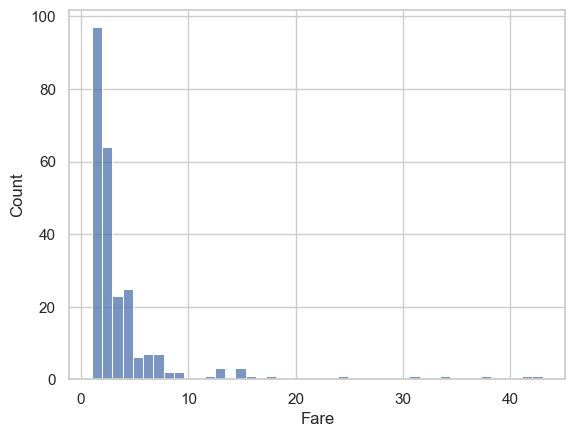

In [87]:
# Step 8. Create a histogram with the Fare payed
sns.histplot(x=titanic["Fare"].value_counts())
plt.show()

# Pokemon

In [88]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Step 2. Create a data dictionary that looks like the DataFrame below
# Step 3. Assign it to a variable called pokemon
pokemon=pd.read_csv('pokemon.txt',sep=" ")
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


In [112]:
# Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place the order of the columns as name, type, hp, evolution, pokedex
pokemon=pokemon.loc[:,['name','type','hp','evolution','pokedex']]

In [116]:
# Step 5. Add another column called place, and insert what you have in mind.
pokemon["place"] = ["Russia","Germany","UK","USA"]

In [118]:
# Step 6. Present the type of each column
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


# Apple Stock


In [119]:
# Step 1. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable apple
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


In [122]:
# Step 4. Check out the type of the columns
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [126]:
# Step 5. Transform the Date column as a datetime type
apple["Date"]=pd.to_datetime(apple["Date"])
apple["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8465 entries, 0 to 8464
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8465 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 66.3 KB


In [127]:
# Step 6. Set the date as the index
apple.set_index("Date")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [133]:
# Step 7. Is there any duplicate dates?
apple["Date"].value_counts()
# No There is not any Duplicate Date

2014-07-08    1
1992-02-18    1
1992-01-28    1
1992-01-29    1
1992-01-30    1
             ..
2003-04-30    1
2003-05-01    1
2003-05-02    1
2003-05-05    1
1980-12-12    1
Name: Date, Length: 8465, dtype: int64

In [149]:
# Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.
apple.sort_values("Date",inplace=True)
apple.set_index("Date",inplace=True)

In [159]:
# Step 9. Get the last business day of each month
apple.resample('M').last()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-31,637.98,644.17,628.90,633.00,141005200,90.43


In [176]:
# Step 10. What is the difference in days between the first day and the oldest
first_day=apple.index.min()
oldest_day=apple.index.max()

difference = (oldest_day - first_day).days
difference

12261

In [178]:
# Step 11. How many months in the data we have?
len(apple.resample("M").last())

404

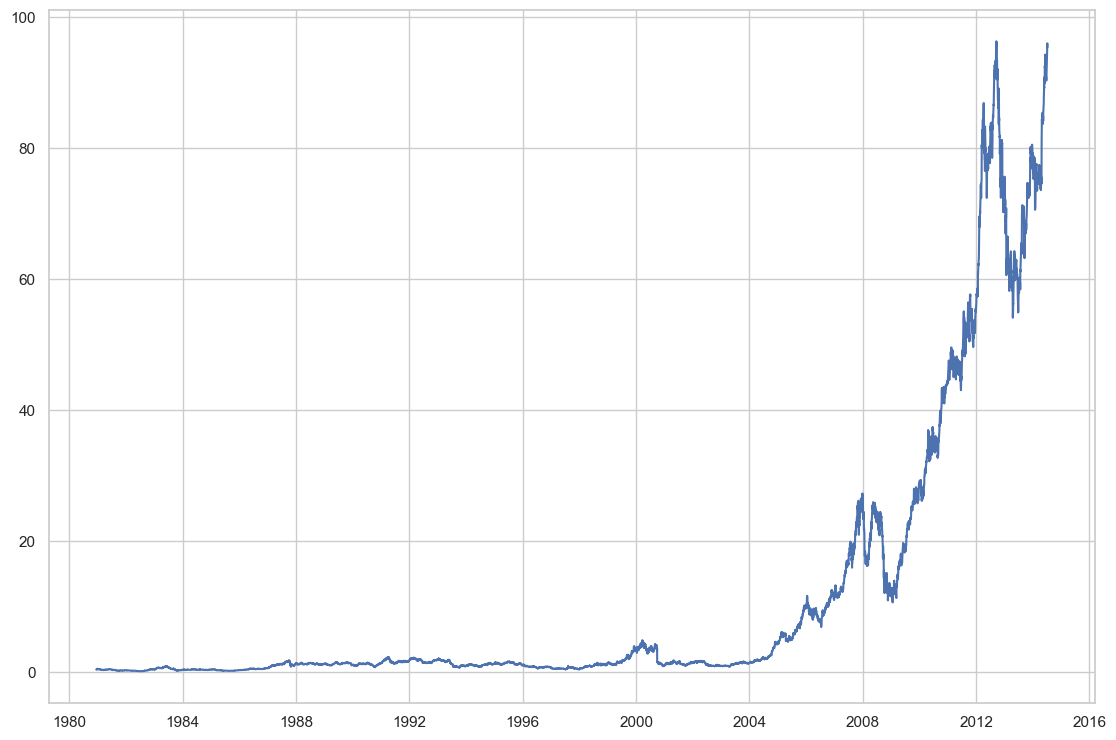

In [192]:
# Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches
plt.figure(figsize=[13.5,9])
plt.plot(apple["Adj Close"])
plt.show()